# CNN: Métodos que selecionam exemplos para manter no dataset

## Gerar dataset desbalanceado (99:1)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot as plt
from numpy import where

Counter({0: 9900, 1: 100})


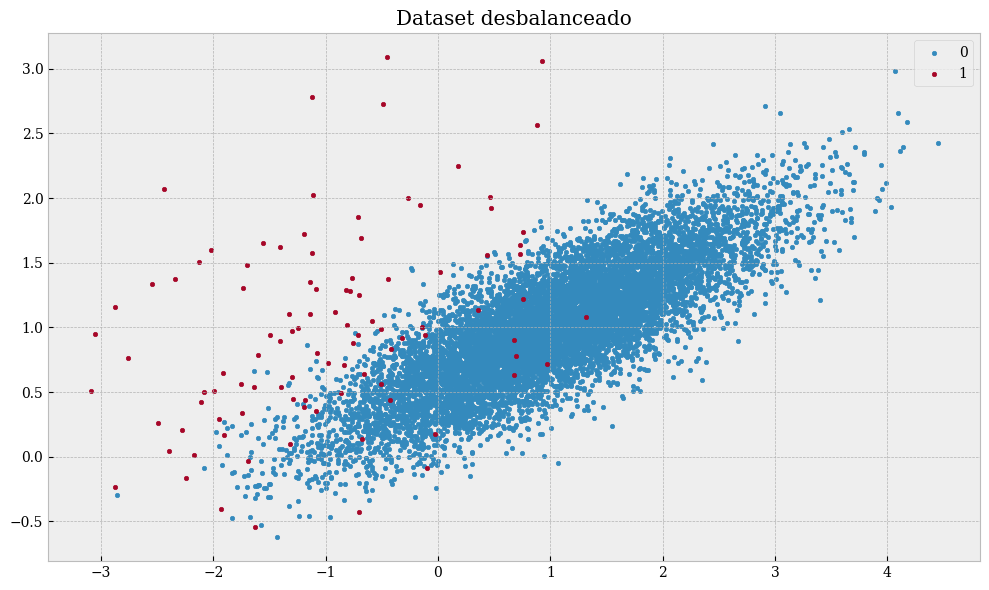

In [ ]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
for label, _ in counter.items():
  row_xi = where(y == label)[0]
  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset desbalanceado')
plt.legend()
plt.tight_layout()
plt.savefig('dsdesbalanceado.png')
plt.show()

## CNN - Condensed Nearest Neighbor

É uma técnica que seleciona um subconjunto de uma coleção de amostras que resultam em nenhuma perda no desempenho do modelo (conjunto consistente mínimo /training set consistent).

... the notion of a consistent subset of a sample set. This is a subset which, when used as a stored reference set for the NN rule, correctly classifies all of the remaining points in the sample set.

## Procedimento:

1. The first sample is placed in STORE.
2. The second sample is classified by the NN rule, using as a
reference set the current contents of STORE. (Since STORE has only
one point, the classification is trivial at this stage.) If the second
sample is classified correctly it is placed in GRABBAG; otherwise it
is placed in STORE.
3. Proceeding inductively, the ith sample is classified by the
current contents of STORE. If classified correctly it is placed in
GI~ABBAG; otherwise it is placed in STORE.
4. After one pass through the original sample set, the procedure
continues to loop through GRABRAG until termination, which can
occur in one of two ways:
  1. The GRABBAG is exhausted, with all its members now transferred to STORE (in which case, the consistent subset found
is the entire original set), or
  2. One complete pass is made through GRABBAG with no
transfers to STORE. (If this happens, all subsequent passes
through GRABBAG will result in no transfers, since the
underlying decision surface has not been changed.)
5. The final contents of STORE are used as reference points for
the NN rule; the contents of GRABBAG are discarded.


Counter({0: 188, 1: 100})


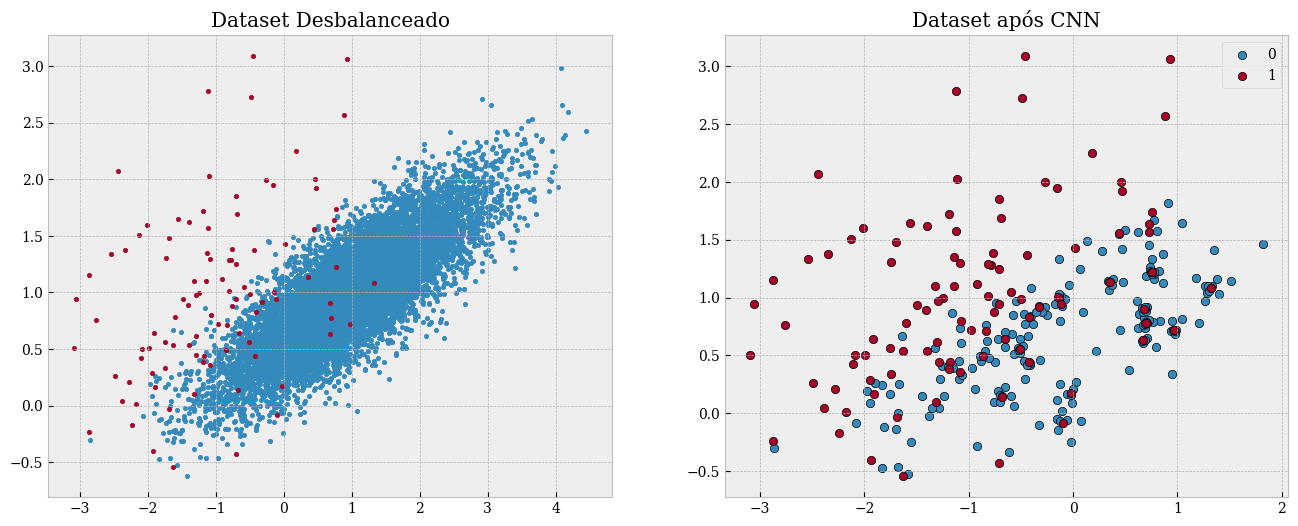

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')
#plt.legend()

# CNN
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors=1)
X_under, y_under = undersample.fit_resample(X, y)

counter= Counter(y_under)
print(counter)

for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  axs[1].scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')

axs[1].set_title('Dataset após CNN')
plt.legend()
#plt.tight_layout()
plt.show()

# Tomek Links: Métodos que selecionam exemplos para excluir do dataset

Counter({0: 9874, 1: 100})


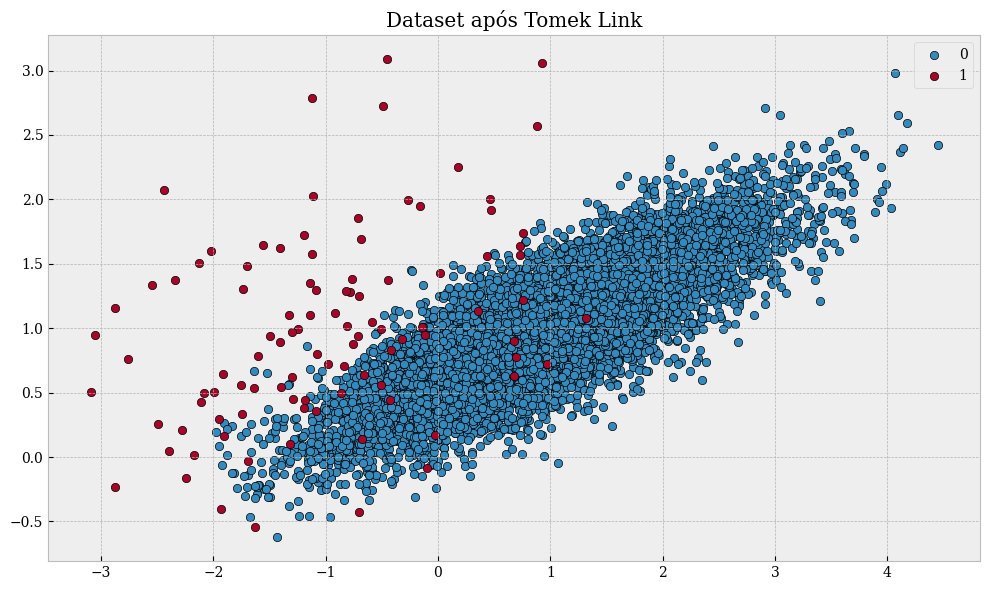

In [ ]:
from imblearn.under_sampling import TomekLinks

# Tomek-links
undersample = TomekLinks()
X_under, y_under = undersample.fit_resample(X, y)

counter= Counter(y_under)
print(counter)

plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  plt.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')

plt.title('Dataset após Tomek Link')
plt.legend()
plt.tight_layout()
plt.show()

# Tomek links + CNN


Counter({0: 113, 1: 100})


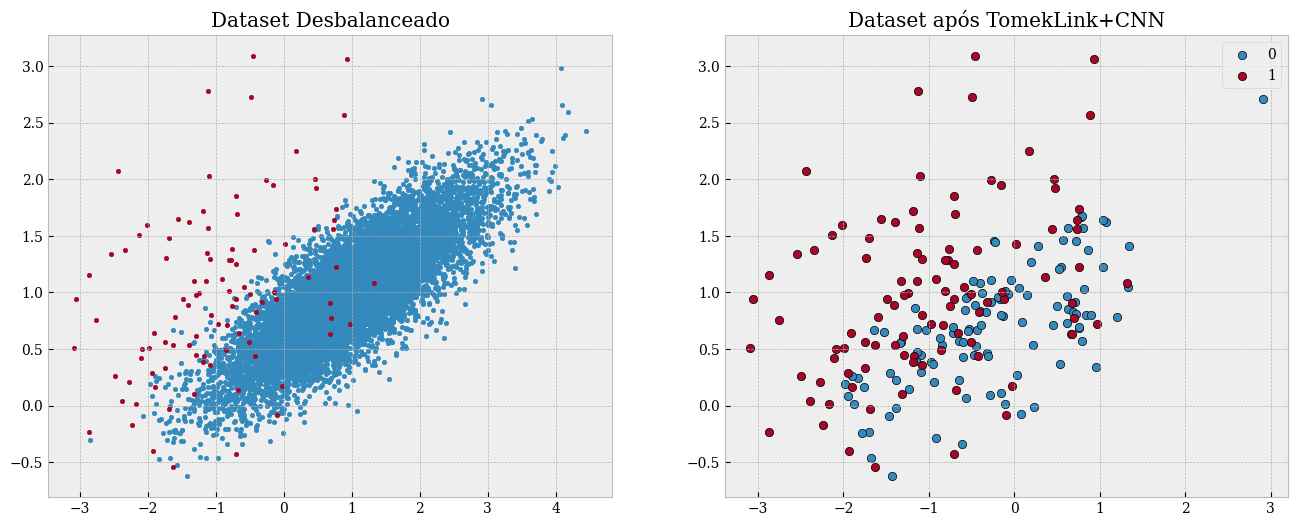

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')
#plt.legend()

undersample = TomekLinks()
X_under, y_under = undersample.fit_resample(X, y)

undersample = CondensedNearestNeighbour(n_neighbors=3)
X_under, y_under = undersample.fit_resample(X_under, y_under)
counter= Counter(y_under)
print(counter)

#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  axs[1].scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')
axs[1].set_title('Dataset após TomekLink+CNN')

plt.legend()
#plt.tight_layout()
plt.show()